# 7장 케라스 신경망 모델 활용법

**감사말**

프랑소와 숄레의 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 7장에 사용된 코드에 대한 설명을 담고 있으며 텐서플로우 2.6 버전 이상에서 작성되었습니다. 소스코드를 공개한 저자에게 감사드립니다.

**구글 코랩 설정**

'런타임 -> 런타임 유형 변경' 메뉴에서 GPU를 지정한다.
TensorFlow 버전을 확인하려면 아래 명령문을 실행한다.

In [1]:
import tensorflow as tf
tf.__version__

'2.13.1'

TensorFlow가 GPU를 사용하는지 여부를 확인하려면 아래 명령문을 실행한다.
아래와 같은 결과가 나오면 GPU가 제대로 지원됨을 의미한다.

```
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
```

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**참고**

아래 코드에 대한 자세한 설명은
[머신러닝 모델 고급 활용법](https://codingalzi.github.io/dlp2/working_with_keras.html)를 
참고한다.

## 7.1. 신경망 모델 구성법 1: `Sequential` 모델 활용

**`Sequential` 클래스**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

층의 추가는 `add` 메서드를 이용할 수도 있다.
아래 코드는 앞서 정의한 모델과 동일한 모델을 구성한다.

In [4]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**모델의 가중치와 `build()` 메서드**

입력값 대신 `build()` 메서드를 특성 수 정보를 이용하여 직접 호출하면
가중치 텐서가 무작위로 초기화된 형식으로 생성된다.
즉, **모델 빌드**가 완성된다.

- `input_shape` 키워드 인자: `(None, 특성수)`
- `None`은 임의의 크기의 배치도 다룰 수 있다는 것을 의미함.

In [5]:
model.build(input_shape=(None, 3))

**층별 가중치 텐서**

모델 빌드가 완성되면 `weights` 속성에 생성된 모델 훈련에 필요한 모든 가중치와 편향이 저장된다.
위 모델에 대해서 층별로 가중치와 편향 텐서 하나씩 총 4 개의 텐서가 생성된다.

In [6]:
len(model.weights)

4

- 1층의 가중치 행렬(2차원 텐서) 모양: (3, 64)
    - 입력값 특성: 3개
    - 출력값 특성: 64개

In [7]:
model.weights[0].shape

TensorShape([3, 64])

- 1층의 편향 벡터(1차원 텐서) 모양: (64,)
    - 출력값 특성: 64개    

In [8]:
model.weights[1].shape

TensorShape([64])

- 2층의 가중치 행렬(2차원 텐서): (64, 10)
    - 입력값 특성: 64개
    - 출력값 특성: 10개

In [9]:
model.weights[2].shape

TensorShape([64, 10])

- 2층의 편향 벡터(1차원 텐서) 모양: (10,)
    - 출력값 특성: 10개    

In [10]:
model.weights[3].shape

TensorShape([10])

**`summary()` 메서드**

완성된 모델의 요악한 내용은 확인할 수 있다.

- 모델과 층의 이름
- 층별 파라미터 수
- 층별 파라미터 수
- 모델 전체 파라미터 수
    - 학습(trainable) 파라미터 수
    - 비학습(non-trainable) 파라미터 수

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**`Input()` 함수**

`Input()`함수를 이용하여 모델 훈련에 사용될 입력값에 대한 정보를 모델에 미리 전달할 수 있다. 
예를 들어 아래 코드는 훈련셋의 샘플이 3 개의 특성을 갖는다는 것을 가리킨다. 
물론, 이렇게 입력값의 정보를 미리 지정하면 지정된 모양의 훈련셋만 사용할 수 있다.

In [12]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

이제 `build()` 메서드를 실행할 필요 없이 바로 `summary()`를 실행하여 신경망 모델의 구조를 확인할 수 있다.

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


층을 추가할 때 마다 모델의 구조를 확인할 수 있다.

In [14]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 7.2. 신경망 모델 구성법 2: 함수형 API

**기본 활용법**

앞서 살펴 본 `Sequential` 모델을 함수형 API를 이용하여 구성하면 다음과 같다.

In [15]:
inputs = keras.Input(shape=(3,), name="my_input")          # 입력층
features = layers.Dense(64, activation="relu")(inputs)     # 은닉층
outputs = layers.Dense(10, activation="softmax")(features) # 출력층

model = keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 다중 입력, 다중 출력 모델

**예제: 고객 요구사항 접수 모델**

고객의 요구사항이 입력되었을 때 처리 우선순위와 담당부서를 지정하는 시스템을 구현하려 한다. 고객의 요구사항은 세 종류의 입력값으로 구성된다. 따라서 시스템에 사용될 딥러닝 신경망 모델은 세 개의 입력값과 두 개의 출력값을 사용한다.

In [17]:
vocabulary_size = 10000    # 사용빈도 1만등 인내 단어 사용
num_tags = 100             # 태그 수
num_departments = 4        # 부서 수

# 입력층: 세 개
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

# 은닉층
features = layers.Concatenate()([title, text_body, tags]) # shape=(None, 10000+10000+100)
features = layers.Dense(64, activation="relu")(features)

# 출력층: 두 개
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

# 모델 빌드: 입력값으로 구성된 입력값 리스트와 출력값으로 구성된 출력값 리스트 사용
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

은닉층으로 사용된 `Concatenate()` 층은 여러 개의 텐서를 좌우로 이어붙이는 기능을 수행한다.
따라서 여기서는 고객의 요구사항을 담고 있는
길이가 각각 1만, 1만, 100인 세 개의 벡터를 이어붙여서 길이가 총 2만1백인 하나의 벡터로 변환한다.

**모델 컴파일**

모델 컴파일 과정에서 지정된 타깃 수만큼 손실함수와 측정 기준을 지정해야 한다.

In [18]:
model.compile(optimizer="adam",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error", "mean_squared_error"], ["accuracy", "AUC", "Precision"]])

**모델 훈련**

모델 훈련을 위해 적절한 개수의 입력 텐서와 타깃 텐서를 지정해야 한다.
여기서는 훈련 과정을 설명하기 위해 
적절한 모양의 입력 텐서 3개와 타깃 텐서 2개를 무작위로 생성해서 사용한다.

In [19]:
import numpy as np

# 샘플 수
num_samples = 1280

# 입력 텐서 3 개 무작위 생성
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))    # 멀티-핫-인코딩

# 타깃 텐서 2 개 무작위 생성
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))  # 멀티-핫-인코딩

`fit()` 함수에 세 개의 훈련 텐서로 이루어진 리스트와 
두 개의 타깃 텐서로 이루어진 리스트를 지정한 후에 실행한다. 

In [20]:
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=10)

Epoch 1/10
40/40 [==============================] - 6s 12ms/step - loss: 8.5516 - priority_loss: 0.3040 - department_loss: 8.2476 - priority_mean_absolute_error: 0.4705 - priority_mean_squared_error: 0.3040 - department_accuracy: 0.1828 - department_auc: 0.4957 - department_precision: 0.5052
Epoch 2/10
40/40 [==============================] - 0s 8ms/step - loss: 4.0154 - priority_loss: 0.3242 - department_loss: 3.6913 - priority_mean_absolute_error: 0.4905 - priority_mean_squared_error: 0.3242 - department_accuracy: 0.2609 - department_auc: 0.5964 - department_precision: 0.6566
Epoch 3/10
40/40 [==============================] - 0s 8ms/step - loss: 10.4215 - priority_loss: 0.3242 - department_loss: 10.0974 - priority_mean_absolute_error: 0.4905 - priority_mean_squared_error: 0.3242 - department_accuracy: 0.2711 - department_auc: 0.5320 - department_precision: 0.5343
Epoch 4/10
40/40 [==============================] - 0s 9ms/step - loss: 14.0900 - priority_loss: 0.3242 - department_loss

**모뎊 평가**

모델 평가도 훈련과 동일한 방식의 인자가 사용된다.

In [21]:
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

40/40 [==============================] - 1s 9ms/step - loss: 23.3734 - priority_loss: 0.3242 - department_loss: 23.0493 - priority_mean_absolute_error: 0.4905 - priority_mean_squared_error: 0.3242 - department_accuracy: 0.1281 - department_auc: 0.4989 - department_precision: 0.4961


[23.37342071533203,
 0.3241587281227112,
 23.04926109313965,
 0.49052172899246216,
 0.3241587281227112,
 0.12812499701976776,
 0.49892574548721313,
 0.49609375]

**모뎊 활용**

예측값은 두 개의 어레이로 구성된 리스트이다.

In [22]:
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 5ms/step


처리 우선순위는 모두 1로 계산되었다.

In [23]:
priority_preds

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

요구사항을 처리해야 하는 부서별 확률값은 다음과 같다.

In [24]:
department_preds

array([[9.9103357e-09, 1.0530484e-07, 9.9999988e-01, 6.3985937e-09],
       [4.7550244e-09, 1.5718099e-06, 9.9999845e-01, 5.1121333e-08],
       [6.3126492e-08, 3.3992814e-07, 9.9999964e-01, 1.2527835e-08],
       ...,
       [7.9487023e-08, 1.5628382e-05, 9.9998426e-01, 1.3026687e-08],
       [1.9028144e-08, 2.9250750e-06, 9.9999702e-01, 8.8489083e-09],
       [5.9408922e-09, 2.9075599e-07, 9.9999976e-01, 2.7305842e-09]],
      dtype=float32)

각각의 요구사항을 처리해야 하는 부서는 `argmax()` 메서드로 확인된다.

In [25]:
department_preds.argmax(axis=1)

array([2, 2, 2, ..., 2, 2, 2])

**사전 객체 활용**

입력층과 출력층의 이름을 이용하여 사전 형식으로 입력값과 출력값을 지정할 수 있다.

In [26]:
model.compile(optimizer="adam",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error", "mean_squared_error"], "department": ["accuracy", "AUC", "Precision"]})

model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)

model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})

priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 3ms/step


### 신경망 모델 구조 그래프 

주의사항: 아래 두 코드가 실행되어 층 연결구조를 그래프로 제대로 보여주도록 하려면
먼저 `pydot` 파이썬 라이브러리와 graphviz 프로그램을 설치해야 한다.
단, 구글 코랩에서는 이미 설치되어 있다.

- `pydot` 라이브러리 설치: `pip install pydot`
- `graphviz` 프로그램 설치 : [https://graphviz.gitlab.io/download/](https://graphviz.gitlab.io/download/) 참고

`plot_model()`을 이용하여 층 연결 구조를 그래프로 나타낼 수 있다.

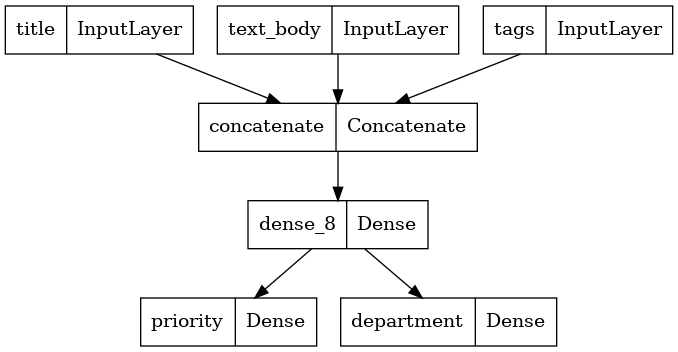

In [28]:
keras.utils.plot_model(model, "ticket_classifier.png")

입력 텐서와 출력 텐서의 모양을 함께 표기할 수도 있다.

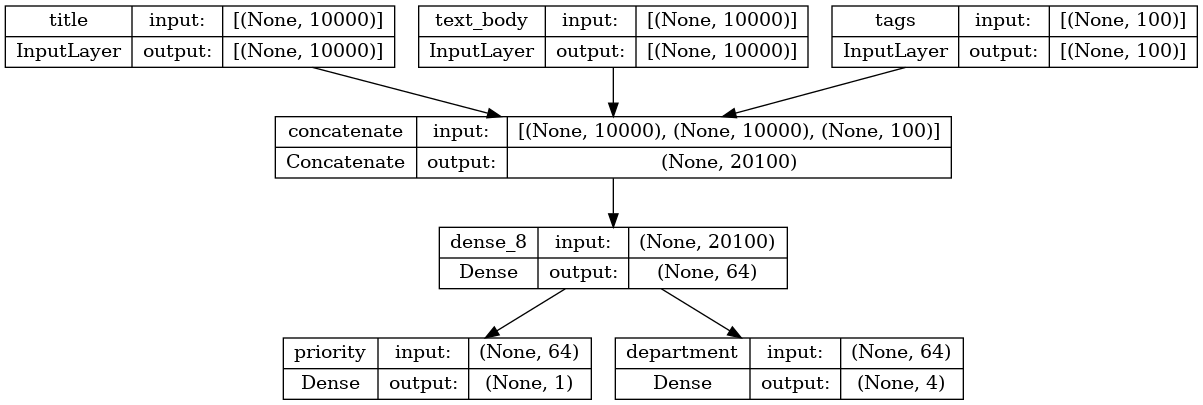

In [29]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

### 신경망 모델 재활용

훈련된 모델의 특성을 이용하여 새로운 모델을 빌드할 수 있다.
먼저 모델의 `layers` 속성을 이용하여 사용된 층에 대한 정보를 확인한다. 
`layers` 속성은 사용된 층들의 객체로 이루어진 리스트를 가리킨다.

In [30]:
model.layers

예를 들어, 3번 인덱스에 해당하는 층의 입력값과 출력값에 대한 정보는 아래처럼 확인할 수 있다.

In [31]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [32]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

여기서는 문제해결의 어려움 정도를 "quick", "medium", "difficult"로 구분하는 어려움 정도를 판별하는
출력층을 추가하여 총 세 종류의 출력값을 생성하는 모델을 얻고자 한다.
원래는 모델을 새로 구성하고 훈련을 처음부터 다시 시작해야 한다.
하지만 어차피 훈련과정이 이전과 특별히 다를 이유가 없다.
이런 경우 이전에 훈련된 모델의 일부를 재활용할 수 있다.
기존에 훈련된 모델을 재활용하는 경우 
일반적으로 출력층을 제외한 나머지 층을 재활용 대상으로 삼는다.

기존 모델에서 출력층은 5번과 6번 인덱스에 위치하기에 
4번 인덱스가 가리키는 (은닉)층의 출력 정보를 따로 떼어낸다.

In [34]:
features = model.layers[4].output

그런 다음 이제 출력층에 문제해결의 어려움 정도를 판별하는 층을 아래와 같이 지정한다.

In [35]:
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

준비된 `'difficulty'` 층을 출력층으로 추가하여 
`priority`, `department`, `difficulty`
세 개의 출력값을 생성하는 새로운 모델을 구성한다.

In [36]:
new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

새로 생성된 모델은 기존에 훈련된 모델의 가중치,
즉, 은닉층에 사용된 가중치는 그대로 사용되며,
모델 구성 그래프는 다음과 같다.

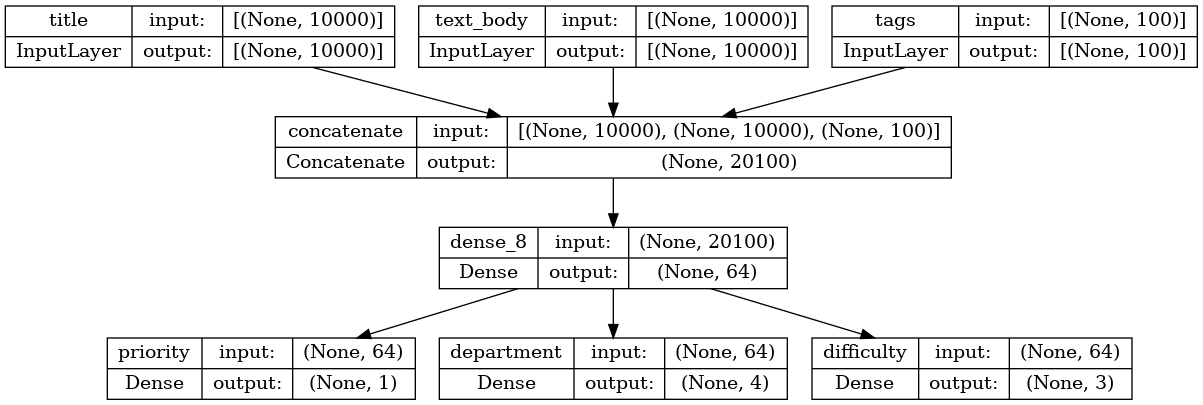

In [37]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

새로 생성된 모델은 출력층을 제외한 나머지 층들이 기존 모델의 훈련 과정에서 학습한 가중치 행렬과 편향 벡터를 그대로 유지한다.

In [38]:
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 title (InputLayer)          [(None, 10000)]              0         []                            
                                                                                                  
 text_body (InputLayer)      [(None, 10000)]              0         []                            
                                                                                                  
 tags (InputLayer)           [(None, 100)]                0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 20100)                0         ['title[0][0]',               
                                                                     'text_body[0][0]',     

모델 재활용은 기존에 매우 잘 훈련된 모델을 새로운 문제를 해결하는 딥러닝 신경망 모델을 훈련시킬 때 많이 사용하는 기법이다. 
[9장](https://codingalzi.github.io/dlp2/computer_vision_advanced.html)에서 모델 재활용을 자세히 다룬다.

## 7.3. 신경망 모델 구성법 3: 서브클래싱

앞서 함수형 API로 구성한 티켓 모델을 서브클래싱을 기법을 이용하여 구현하면 다음과 같다.

서브클래싱으로 모델 클래서를 선언하려면 아래 두 메서드를 목적에 맞추어 
재정의<font size='2'>overriding</font>한다.

- `__init__()` 메서드(생성자): 은닉층과 출력층으로 사용될 층 객체 지정
- `call()` 메서드: 층을 연결하는 과정 지정. 즉, 입력값으부터 출력값을 만들어내는 순전파 과정 묘사.

In [40]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments): # num_departments: 고객 요구사항 처리 부서 개수
        super().__init__()
        self.concat_layer = layers.Concatenate()                      # 은닉층
        self.mixing_layer = layers.Dense(64, activation="relu")       # 은닉층
        self.priority_scorer = layers.Dense(1, activation="sigmoid")  # 출력층 1
        self.department_classifier = layers.Dense(                    # 출력층 2
            num_departments, activation="softmax")

    def call(self, inputs):               # inputs: 사전 객체 입력값. 모양은 미정.
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])    # 은닉층 연결
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)                 # 출력층 연결
        department = self.department_classifier(features)
        return priority, department                               # 두 종류의 출력값 지정

모델 구성은 해당 모델의 객체를 생성하면 된다.
이전과 동일한 구성의 모델은 다음과 같이 선언한다.

In [42]:
model = CustomerTicketModel(num_departments=4)

`Layer`의 경우처럼 가중치는 실제 데이터와 함께 호출되지 전까지 생성되지 않는다.

In [43]:
model.weights

[]

컴파일, 훈련, 평가, 예측은 이전과 완전히 동일한 방식으로 실행된다.

In [44]:
model.compile(optimizer="adam",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error", "mean_squared_error"], ["accuracy", "AUC", "Precision"]])

In [45]:
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 3ms/step


## 7.4. 혼합 신경망 모델 구성법

소개된 세 가지 방식을 임의로 혼합하여 활용할 수 있다. 
무엇보다도 모델 클래스가 층의 하위 클래스이기에 
선언된/훈련된 모델을 다른 모델의 하나의 층으로 활용할 수도 있다.

**예제: 서브클래싱 모델을 함수형 모델에 활용하기** (강추!!!)

먼저 서브클래싱으로 하나의 모델을 선언한다.

- 한 개의 밀집층만 사용
- 이진 분류인 경우: 하나의 유닛과 `sigmoid` 활성화 함수 사용
- 다중 클래스 분류인 경우: 클래스(범주) 수 만큼의 유닛과  `softmax` 활성화 함수 사용

In [47]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

아래 코드는 함수형 API 형식으로 새로운 모델을 지정한다.
이때 위 모델 클래스의 객체를 출력층으로 사용한다.

In [48]:
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**예제: 함수형 모델을 서브클래싱 모델에 활용하기**

먼저 함수형 API 형식으로 하나의 모델을 선언한다.

In [49]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

아래 `MyModel` 클래스는 앞서 선언한 `binary_classifier` 모델을 출력층으로 활용한다.

In [50]:
class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

## 7.5. 훈련 평가 방식 지정

신경망 모델의 구성, 훈련, 평가, 예측은 정해진 방식으로 차례대로 이루어진다.
아래 코드는 MNIST 데이터셋을 이용한 모델 훈련 전반 과정을 보여준다.

- 데이터셋 준비

In [51]:
from tensorflow.keras.datasets import mnist

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

- 모델 선언

In [52]:
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

- 모델 훈련

In [53]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))

Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2928 - accuracy: 0.9132 - val_loss: 0.1535 - val_accuracy: 0.9551
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1587 - accuracy: 0.9536 - val_loss: 0.1233 - val_accuracy: 0.9652
Epoch 3/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1276 - accuracy: 0.9629 - val_loss: 0.0970 - val_accuracy: 0.9743


- 모델 평가 및 활용

In [54]:
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


### 사용자 정의 평가지표

**`Metric` 클래스 상속**

아래 세 개의 메서드를 재정의(overriding)해야 한다.

- `update_state()`
- `result()`
- `reset_state()`

아래 코드는 평균제곱근오차(RMSE)를 평가지표로 사용하는 클래스를 
이용하는 모델 훈련을 소개한다.

In [55]:
class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [56]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 13s 7ms/step - loss: 0.2910 - accuracy: 0.9132 - rmse: 7.1788 - val_loss: 0.1484 - val_accuracy: 0.9582 - val_rmse: 7.3601
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1586 - accuracy: 0.9541 - rmse: 7.3493 - val_loss: 0.1104 - val_accuracy: 0.9684 - val_rmse: 7.4003
Epoch 3/3
313/313 [==============================] - 2s 5ms/step - loss: 0.1006 - accuracy: 0.9711 - rmse: 7.4345


### 콜백

컴퓨터 프로그래밍에서 **콜백**<font size='2'>callback</font>은
하나의 프로그램이 실행되는 도중에 추가적으로 다른 API를 호출하는 기능 또는 해당 API를 가리킨다.
호출된 콜백은 자신을 호출한 프로그램과 독립적으로 실행된다.

신경망 모델 훈련 과정에서 사용될 수 있는 다양한 콜백 기능을 케라스가 제공한다.
일반적으로 손실값, 평가지표 등 훈련 중에 계산되는 기록을 저장하여 활용하며,
가장 많이 활용되는 콜백은 다음과 같다.

```python
keras.callbacks.ModelCheckpoint
keras.callbacks.EarlyStopping
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
keras.callbacks.CSVLogger
```

여기서는 `EarlyStopping`과 `ModelCheckpoint` 두 콜백의 기능을 살펴본다.

**`fit()` 메서드에서 `callbacks` 인자 사용하기**

아래 코드에 사용된 옵션은 다음과 같다.

- `EarlyStopping`: 검증셋에 대한 정확도가 2 에포크(epoch) 연속 개선되지 않을 때 훈련 종료
- `ModelCheckpoint`: 매 에포크마다 훈련된 모델 저장. 
    `save_best_only=True`가 설정된 경우 검증셋에 대한 손실값이 가장 낮은 모델만 저장.

In [57]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path",
        monitor="val_loss",
        save_best_only=True,
    )
]

In [58]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1560/1563 [============================>.] - ETA: 0s - loss: 0.2935 - accuracy: 0.9125INFO:tensorflow:Assets written to: checkpoint_path/assets


INFO:tensorflow:Assets written to: checkpoint_path/assets


1563/1563 [==============================] - 10s 6ms/step - loss: 0.2933 - accuracy: 0.9125 - val_loss: 0.1411 - val_accuracy: 0.9595
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 0.1591 - accuracy: 0.9535INFO:tensorflow:Assets written to: checkpoint_path/assets


INFO:tensorflow:Assets written to: checkpoint_path/assets


1563/1563 [==============================] - 9s 6ms/step - loss: 0.1591 - accuracy: 0.9535 - val_loss: 0.1262 - val_accuracy: 0.9646
Epoch 3/10
1560/1563 [============================>.] - ETA: 0s - loss: 0.1291 - accuracy: 0.9625INFO:tensorflow:Assets written to: checkpoint_path/assets


INFO:tensorflow:Assets written to: checkpoint_path/assets


1563/1563 [==============================] - 10s 6ms/step - loss: 0.1292 - accuracy: 0.9625 - val_loss: 0.1040 - val_accuracy: 0.9719
Epoch 4/10
1555/1563 [============================>.] - ETA: 0s - loss: 0.1097 - accuracy: 0.9690INFO:tensorflow:Assets written to: checkpoint_path/assets


INFO:tensorflow:Assets written to: checkpoint_path/assets


1563/1563 [==============================] - 9s 6ms/step - loss: 0.1095 - accuracy: 0.9690 - val_loss: 0.0963 - val_accuracy: 0.9743
Epoch 5/10
1557/1563 [============================>.] - ETA: 0s - loss: 0.1045 - accuracy: 0.9711INFO:tensorflow:Assets written to: checkpoint_path/assets


INFO:tensorflow:Assets written to: checkpoint_path/assets


1563/1563 [==============================] - 10s 6ms/step - loss: 0.1044 - accuracy: 0.9711 - val_loss: 0.0925 - val_accuracy: 0.9760
Epoch 6/10
1558/1563 [============================>.] - ETA: 0s - loss: 0.0946 - accuracy: 0.9747INFO:tensorflow:Assets written to: checkpoint_path/assets


INFO:tensorflow:Assets written to: checkpoint_path/assets


1563/1563 [==============================] - 9s 6ms/step - loss: 0.0947 - accuracy: 0.9747 - val_loss: 0.0916 - val_accuracy: 0.9779
Epoch 7/10
1553/1563 [============================>.] - ETA: 0s - loss: 0.0865 - accuracy: 0.9762INFO:tensorflow:Assets written to: checkpoint_path/assets


INFO:tensorflow:Assets written to: checkpoint_path/assets


1563/1563 [==============================] - 9s 6ms/step - loss: 0.0872 - accuracy: 0.9762 - val_loss: 0.0885 - val_accuracy: 0.9785
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0799 - accuracy: 0.9786 - val_loss: 0.0975 - val_accuracy: 0.9769
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0762 - accuracy: 0.9794 - val_loss: 0.0959 - val_accuracy: 0.9782


조기종료 후 훈련과정에서 저장된 최고 성능의 모델을 불러오면 다음과 같다.

In [59]:
model = keras.models.load_model("checkpoint_path")

**사용자 정의 콜백 활용**

**`Callback` 클래스 상속**

매 에포크와 매 배치 훈련 단계의 시작과 종료 지점에서
수행해야 할 기능을 정의해야 하며 아래 메서드를 재정의하는 방식으로 이루어진다.

```python
on_epoch_begin(epoch, logs)
on_epoch_end(epoch, logs)
on_batch_begin(batch, logs)
on_batch_end(batch, logs)
on_train_begin(logs)
on_train_end(logs)
```

각 메서드에 사용되는 인자는 훈련 과정 중에 자동으로 생성된 객체로부터 값을 받아온다.

- `logs` 인자: 이전 배치와 에포크의 훈련셋과 검증셋에 대한 손실값, 평가지표 등을 포함한 사전 객체.
- `batch`, `epoch`: 배치와 에포크 정보

다음 `LossHistory` 콜백 클래스는 배치 훈련이 끝날 때마다 손실값을 저장하고
에포크가 끝날 때마다 배치별 손실값을 그래프로 저장하여 훈련이 종료된 후 시각화하여 보여주도록 한다.

In [61]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2940 - accuracy: 0.9117 - val_loss: 0.1559 - val_accuracy: 0.9561
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1562 - accuracy: 0.9540 - val_loss: 0.1191 - val_accuracy: 0.9682
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1279 - accuracy: 0.9634 - val_loss: 0.1101 - val_accuracy: 0.9696
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1145 - accuracy: 0.9683 - val_loss: 0.0988 - val_accuracy: 0.9743
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1041 - accuracy: 0.9718 - val_loss: 0.0915 - val_accuracy: 0.9771
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0934 - accuracy: 0.9737 - val_loss: 0.0874 - val_accuracy: 0.9785
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0863 - accuracy: 0.9761 - val_loss: 0.0893 - val_accur

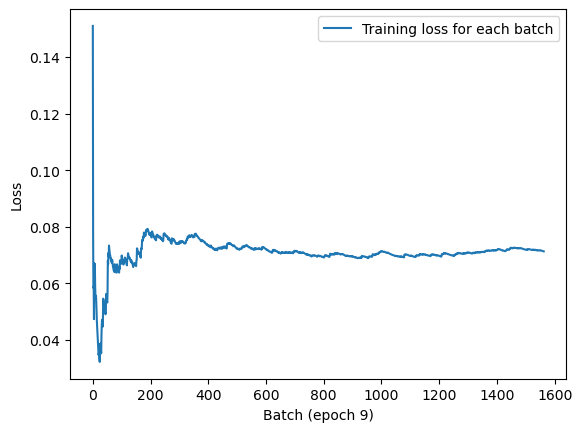

In [62]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### 텐서보드

**텐서보드**(TensorBoard)는 모델 훈련과정을 모니터링하는 최고의 어플이며
텐서플로우와 함께 기본적으로 설치된다.

In [63]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tensorboard_log_dir",
)

model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2966 - accuracy: 0.9120 - val_loss: 0.1546 - val_accuracy: 0.9550
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1595 - accuracy: 0.9543 - val_loss: 0.1119 - val_accuracy: 0.9678
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1304 - accuracy: 0.9627 - val_loss: 0.1048 - val_accuracy: 0.9705
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1148 - accuracy: 0.9675 - val_loss: 0.0964 - val_accuracy: 0.9737
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1052 - accuracy: 0.9710 - val_loss: 0.0913 - val_accuracy: 0.9765
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0954 - accuracy: 0.9747 - val_loss: 0.0950 - val_accuracy: 0.9769
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0884 - accuracy: 0.9760 - val_loss: 0.0951 - val_accura

텐서보드를 주피터 노트북에서 아래처럼 실행할 수 있다.

In [64]:
%load_ext tensorboard
%tensorboard --logdir ./tensorboard_log_dir

텐서보드를 독립적으로 실행하여 훈련과정을 실시간으로 모니터링 하려면
아래 명령문 형식으로 터미널 창에서 실행하고 반환된 주소로 접속하면 된다.

```python
tensorboard --logdir ./tensorboard_log_dir
```

## 훈련/평가 알고리즘 직접 구현하기 (준비중)

모델 컴파일 이후 `fit()` 메서드를 호출하면 모델의 훈련이 진행된다.
그런데 모델의 훈련 방식을 사용자가 직접 조정할 수 있는 방식으로 진행하고자 하면
아래 과정을 자신만의 알고리즘으로 직접 구현하면 된다.

- 순전파<font size='2'>forward pass</font>
- 손실함수의 그레이디언트 계산
- 역전파<font size='2'>backward pass</font>

### Low-level usage of metrics

In [65]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [66]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [67]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [68]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [69]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9149
...loss: 0.2902
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9551
...loss: 0.1564
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9643
...loss: 0.1281


**Writing a step-by-step evaluation loop**

In [70]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9685
...val_loss: 0.1181


### Make it fast with `tf.function`

**Adding a `tf.function` decorator to our evaluation step function**

In [71]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9685
...val_loss: 0.1181


### Leveraging `fit()` with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [72]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [73]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2958
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1570
Epoch 3/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1283


In [74]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [75]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2948 - sparse_categorical_accuracy: 0.9117
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1606 - sparse_categorical_accuracy: 0.9534
Epoch 3/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1285 - sparse_categorical_accuracy: 0.9642
